## Import Libraries

In [8]:
!pip install keras

In [12]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from sklearn.model_selection import KFold
import json
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Mount Google Drive

In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Display Sample Images

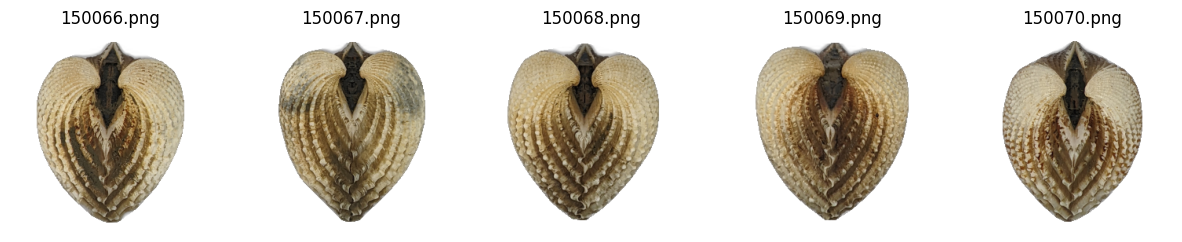

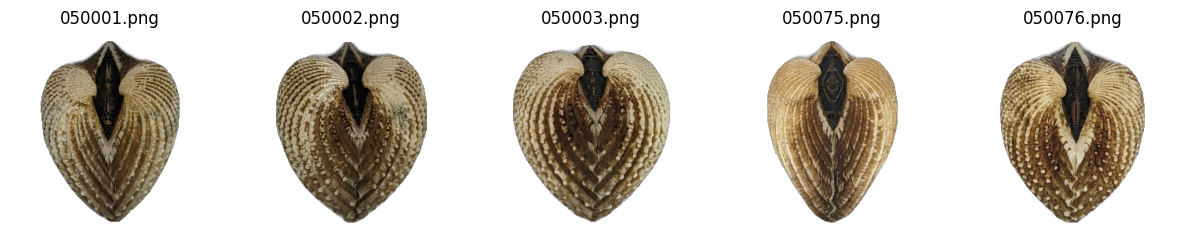

In [11]:
# Define paths to the male and female datasets
male_litob = "/content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/Male"
female_litob = "/content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/Female"

# Get list of image files in male folder
image_files_male = [f for f in os.listdir(male_litob)
                    if os.path.isfile(os.path.join(male_litob, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display first 5 images from male dataset
num_images_to_show = min(5, len(image_files_male))

plt.figure(figsize=(15, 5))
for i in range(num_images_to_show):
    img_path = os.path.join(male_litob, image_files_male[i])
    img = mpimg.imread(img_path)
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(image_files_male[i])
    plt.axis('off')

plt.show()

# Get list of image files in female folder
image_files_female = [f for f in os.listdir(female_litob)
                      if os.path.isfile(os.path.join(female_litob, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display first 5 images from female dataset
plt.figure(figsize=(15, 5))
for i in range(num_images_to_show):
    img_path = os.path.join(female_litob, image_files_female[i])
    img = mpimg.imread(img_path)
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(image_files_female[i])
    plt.axis('off')

plt.show()

## **TRAIN CNN**

### Set Random Seeds for Reproducibility

In [14]:
# Eager execution for TensorFlow
tf.compat.v1.enable_eager_execution()

# Set seeds for reproducibility
os.environ['PYTHONHASHSEED'] = '0'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)

### Load Dataset

In [15]:
# Path to dataset directory
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/"

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 256, 256, 3
loss_function = binary_crossentropy
no_classes = 2
no_epochs = 20
verbosity = 1
num_folds = 5
metrics = ['accuracy']

# Load dataset using image_dataset_from_directory
dataset = image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='int',
    class_names=['Female', 'Male'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_width, img_height),
    interpolation='nearest',
    shuffle=True,
    seed=42,
    validation_split=None,
    follow_links=False,
)

Found 226 files belonging to 2 classes.


### K-Fold Cross Validation

In [17]:
# Convert dataset to numpy arrays for K-fold cross-validation
image_files = []
labels = []
for images, batch_labels in dataset.unbatch():  # Unbatch dataset to get all images and labels
    image_files.append(images.numpy())
    labels.append(batch_labels.numpy())

image_files = np.array(image_files)  # Convert list to numpy array
labels = np.array(labels)

In [18]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)
fold_no = 1

### Define and Train the CNN

In [ ]:
import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import KFold
from tensorflow.keras import layers
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize seeds for reproducibility
os.environ['PYTHONHASHSEED'] = '0'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)

# Path to the dataset
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/"

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 256, 256, 3
loss_function = binary_crossentropy
no_classes = 2
no_epochs = 20
verbosity = 1
num_folds = 5
metrics = ['accuracy']

# Load the dataset
dataset = image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='int',
    class_names=['Female', 'Male'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_width, img_height),
    interpolation='nearest',
    shuffle=True,
    seed=42,
    validation_split=None,
    follow_links=False,
)

# Convert dataset to list of images and labels
image_files = []
labels = []
for images, batch_labels in dataset.unbatch():
    image_files.append(images.numpy())
    labels.append(batch_labels.numpy())

image_files = np.array(image_files)
labels = np.array(labels)

# Per-fold score containers
cnn_acc_per_fold = []
cnn_loss_per_fold = []
cnn_precision_per_fold = []
cnn_recall_per_fold = []
cnn_f1_per_fold = []

svm_acc_per_fold = []
svm_precision_per_fold = []
svm_recall_per_fold = []
svm_f1_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)
fold_no = 1

# Run the model on GPU if available
with tf.device('/device:GPU:0'):
    for train, test in kfold.split(image_files, labels):
        # Gather data for the current fold
        train_images = image_files[train]
        train_labels = labels[train]
        val_images = image_files[test]
        val_labels = labels[test]

        # Create train and validation datasets
        train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
        val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(batch_size)

        print(f'------------------------------------------------------------------------')
        print(f'Training for fold {fold_no} ...')

        # Step 1: Create the CNN model
        input_layer = tf.keras.Input(shape=(img_width, img_height, img_num_channels))
        rescaling = layers.Rescaling(1./255)(input_layer)
        conv1 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(rescaling)
        pool1 = layers.MaxPooling2D((5, 5), padding='same')(conv1)
        conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(pool1)
        pool2 = layers.MaxPooling2D((5, 5), padding='same')(conv2)
        flatten = layers.Flatten()(pool2)
        features = layers.Dense(128, activation='relu', name='features_layer')(flatten)
        dropout = layers.Dropout(0.5)(features)
        output = layers.Dense(1, activation='sigmoid')(dropout)

        cnn_model = Model(inputs=input_layer, outputs=output)

        cnn_model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=loss_function,
            metrics=metrics
        )

        try:
            # Train the CNN model
            history = cnn_model.fit(
                train_ds,
                epochs=no_epochs,
                validation_data=val_ds,
                verbose=verbosity
            )

            # Evaluate CNN model
            cnn_scores = cnn_model.evaluate(val_ds, verbose=0)
            print(f'CNN Score for fold {fold_no}: {cnn_model.metrics_names[0]} of {cnn_scores[0]}; {cnn_model.metrics_names[1]} of {cnn_scores[1] * 100}%')

            # Calculate CNN metrics
            cnn_predictions = cnn_model.predict(val_ds)
            cnn_binary_predictions = (cnn_predictions > 0.5).astype(int).reshape(-1)

            # Extract validation labels for metrics calculation
            val_labels_np = []
            for _, labels_batch in val_ds:
                val_labels_np.extend(labels_batch.numpy())
            val_labels_np = np.array(val_labels_np)

            cnn_precision = precision_score(val_labels_np, cnn_binary_predictions)
            cnn_recall = recall_score(val_labels_np, cnn_binary_predictions)
            cnn_f1 = f1_score(val_labels_np, cnn_binary_predictions)

            # Store CNN metrics
            cnn_acc_per_fold.append(cnn_scores[1] * 100)
            cnn_loss_per_fold.append(cnn_scores[0])
            cnn_precision_per_fold.append(cnn_precision)
            cnn_recall_per_fold.append(cnn_recall)
            cnn_f1_per_fold.append(cnn_f1)

            # Step 2: Extract features using the feature extractor model
            feature_extractor = Model(
                inputs=cnn_model.input,
                outputs=cnn_model.get_layer('features_layer').output
            )

            print("Extracting features for SVM...")

            # Extract features from training set
            train_features = []
            train_features_labels = []
            for images_batch, labels_batch in train_ds:
                batch_features = feature_extractor.predict(images_batch, verbose=0)
                train_features.extend(batch_features)
                train_features_labels.extend(labels_batch.numpy())

            train_features = np.array(train_features)
            train_features_labels = np.array(train_features_labels)

            # Extract features from validation set
            val_features = []
            val_features_labels = []
            for images_batch, labels_batch in val_ds:
                batch_features = feature_extractor.predict(images_batch, verbose=0)
                val_features.extend(batch_features)
                val_features_labels.extend(labels_batch.numpy())

            val_features = np.array(val_features)
            val_features_labels = np.array(val_features_labels)

            # Step 3: Train SVM on the extracted features
            print("Training SVM classifier...")
            svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
            svm_classifier.fit(train_features, train_features_labels)

            # Evaluate SVM model
            svm_predictions = svm_classifier.predict(val_features)

            svm_accuracy = accuracy_score(val_features_labels, svm_predictions)
            svm_precision = precision_score(val_features_labels, svm_predictions)
            svm_recall = recall_score(val_features_labels, svm_predictions)
            svm_f1 = f1_score(val_features_labels, svm_predictions)

            print(f'SVM Score for fold {fold_no}: Accuracy: {svm_accuracy * 100}%')

            # Store SVM metrics
            svm_acc_per_fold.append(svm_accuracy * 100)
            svm_precision_per_fold.append(svm_precision)
            svm_recall_per_fold.append(svm_recall)
            svm_f1_per_fold.append(svm_f1)

        except Exception as e:
            print(f"Error during training: {e}")
            continue

        # Increment fold number
        fold_no += 1

# Print CNN results
print('------------------------------------------------------------------------')
print('CNN Scores per fold:')
for i in range(len(cnn_acc_per_fold)):
    print(f'> Fold {i + 1} - Loss: {cnn_loss_per_fold[i]} - Accuracy: {cnn_acc_per_fold[i]}%')

print('------------------------------------------------------------------------')
print('CNN Average scores for all folds:')
print(f'> Accuracy: {np.mean(cnn_acc_per_fold)} (+- {np.std(cnn_acc_per_fold)})')
print(f'> Loss: {np.mean(cnn_loss_per_fold)}')
print(f'> Precision: {np.mean(cnn_precision_per_fold)}')
print(f'> Recall: {np.mean(cnn_recall_per_fold)}')
print(f'> F1 score: {np.mean(cnn_f1_per_fold)}')

# Print SVM results
print('------------------------------------------------------------------------')
print('SVM Scores per fold:')
for i in range(len(svm_acc_per_fold)):
    print(f'> Fold {i + 1} - Accuracy: {svm_acc_per_fold[i]}%')

print('------------------------------------------------------------------------')
print('SVM Average scores for all folds:')
print(f'> Accuracy: {np.mean(svm_acc_per_fold)} (+- {np.std(svm_acc_per_fold)})')
print(f'> Precision: {np.mean(svm_precision_per_fold)}')
print(f'> Recall: {np.mean(svm_recall_per_fold)}')
print(f'> F1 score: {np.mean(svm_f1_per_fold)}')

# Compare CNN and SVM performance
print('------------------------------------------------------------------------')
print('CNN vs SVM Performance Comparison:')
print(f'CNN Average Accuracy: {np.mean(cnn_acc_per_fold)}%')
print(f'SVM Average Accuracy: {np.mean(svm_acc_per_fold)}%')
print(f'Accuracy Difference (SVM - CNN): {np.mean(svm_acc_per_fold) - np.mean(cnn_acc_per_fold)}%')
print('------------------------------------------------------------------------')

Found 226 files belonging to 2 classes.
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.4402 - loss: 0.8482 - val_accuracy: 0.5435 - val_loss: 0.6910
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.4598 - loss: 0.7068 - val_accuracy: 0.5435 - val_loss: 0.6905
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.4636 - loss: 0.6982 - val_accuracy: 0.6304 - val_loss: 0.6930
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5622 - loss: 0.6932 - val_accuracy: 0.4565 - val_loss: 0.6933
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.4373 - loss: 0.6936 - val_accuracy: 0.4565 - val_loss: 0.6933
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.5398 - loss: 0.6924 - val_accuracy: 0.4565 - val_loss: 0.6932
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.5733 - loss: 0.6911 - val_accuracy: 0.4565 - val_loss: 0.